# Digital Signal Processing - 1

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Introduction
Here is a tutorial on the basics of digital signal processing using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, as well as knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of the program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries. 

## Signals

*A signal* is a physical process, the parameters of which change in accordance with the transmitted message. The signal is a material carrier of information. According to the way of presentation, signals are divided into two groups - *random* and *deterministic*. They are described by a mathematical model or a function that characterizes the change in signal parameters.

*A random* signal is a function of time, the values ​​of which are unknown in advance and can be predicted only with a certain *probability*. The main characteristics of random signals are:

* distribution law (relative residence time of the signal value in a certain interval),
* spectral power distribution.

*Deterministic* signals are described by an analytical function (set analytically), and their behavior is fully known at any time. Deterministic signals, in turn, are * periodic * and * non-periodic *. Non-periodic signals are usually time limited.

*Periodic* signal is a signal that repeats in time with a certain period, that is, for which the condition is satisfied:

$s(t) = s(t+kT)$, 

where * k * is any integer, * T * is the repetition period.

An example of a * periodic * signal is a harmonic oscillation described by the following expression:

$s(t) = A \cdot cos(\frac{2\pi\cdot t}{T} +\phi)$, 

where * A * - vibration amplitude, φ - initial phase.

It is known that any complex periodic signal can be represented as a sum of harmonic oscillations with frequencies that are multiples of the fundamental frequency ** ω = 2π / T **.  

### Digital signals

All signals can be divided into four groups:
* analog,
* discrete,
* quantized,
* digital.

** Analog ** signal - described by a continuous function of time. An analog signal provides data transmission by continuously varying amplitude, frequency, or phase over time. Almost all physical processes are described by continuous functions of time, therefore, they are analog signals. For an analog signal, the range of values ​​and definitions is described * by a continuous set *.

A ** discrete ** signal is characterized by an intermittent (discrete) change in the signal over time. That is, changes in the signal occur abruptly at some time intervals, called the sampling interval - Δt or Td. Sampling * an analog signal * is that the signal is represented as a sequence of values ​​taken at discrete moments in time, which are called * samples * (samples).

To correctly recover an analog signal from a digital one without distortion and loss, a sampling theorem is used, known as the ** Kotelnikov (Nyquist-Shannon) theorem **. 

> Any continuous signal with a limited spectrum can be unambiguously and losslessly recovered from its discrete samples taken with a frequency strictly greater than twice the upper frequency of the continuous signal spectrum.

The formula of the Kotelnikov theorem:  

$F_s = \frac{1}{T_s} > 2F_a$, 

Where
* F <sub> s </sub> - signal sampling rate,
* F <sub> a </sub> - the upper frequency of the analog signal spectrum.

This definition refers to functions of time, which consist of frequencies from zero to $ F_a $.

In real problems in radio engineering, the signal spectrum can lie in any frequency range and begin and end at any frequency, in this regard, the definition of Kotelnikov's Theorem is correctly considered relative to the spectrum width of such a signal:

> Any continuous spectrum-limited signal can be unambiguously and losslessly recovered from its discrete samples taken with a frequency strictly greater than twice the bandwidth occupied by the continuous signal spectrum. 

$F_s = \frac{1}{T_s} > 2\Delta f$, 
Where

* $ \Delta f $ - continuous signal spectrum width.

** Quantized ** signals take a number of finite values ​​from a range of continuous or discrete values. As a rule, signals are quantized in level, that is, in amplitude.

** Digital ** signals are derived from analog signals using ** sampling ** and ** quantizing ** level operations. The digital signal values ​​are assigned a codeword or set of characters (often binary).

Devices that perform time sampling and level quantization are called ** analog-to-digital converters (ADC) **.
Devices that convert a digital signal to analog are called ** digital-to-analog converters (DAC) **.
____
Working with signals in ** Python ** requires a number of preliminary steps.
It is necessary to import the * numpy * library for quick and high-quality performance of mathematical operations, as well as graphic display tools from the * matplotlib * library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

Recall that the magic function `% matplotlib inline` allows you to display graphs without calling the method` plt.show () `

The example below shows signals in analog, discrete, and quantized form.

** Step 1 **: create a series of temporary values:
The `np.linspace (start, stop, num)` function sets a vector in the range [start, stop], and * num * is the number of points in the range.

** Step 2 **: Create an Arbitrary Waveform:
Using the `np.sin ()` function, set a signal from a set of harmonic influences. For simplicity, the amplitudes of all components are equal to 1, and the phase shift is zero.

** Step 3 **: Drawing graphs.
Matplotlib methods set different display style:
* `plot()` - standard graph, outputs a signal in analog form,
* `stem()` - graph in the form of samples, outputs the signal in discrete form,
* `step()` - graph in the form of levels, outputs the signal in quantized form.

To reduce the amount of code, a helper function `plt_sel (s, *args, **kwargs)` was created, which selects the style of displaying the chart. The `*args` arguments pass values ​​along the ordinate and abscissa axes,` **kwargs` is used to pass parameters to the `stem()` method.

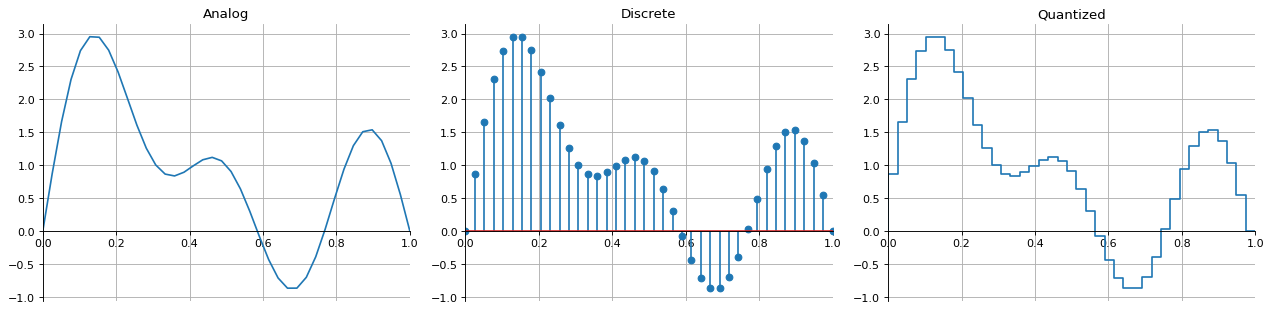

In [2]:
n = 40
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Analog', 'Discrete', 'Quantized']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()

If the quantization and sampling steps are not chosen correctly, the signal conversion from analog to discrete form will be distorted. Let us show by an example an illiterate choice of a sampling step and a quantization step.

Let's set the sine graph. The length of the signal is `n = 64` samples, which fit one period of the harmonic signal. Let's set the quantization step so as to have a sample of `d = 3, 5, 8 and 32` samples.

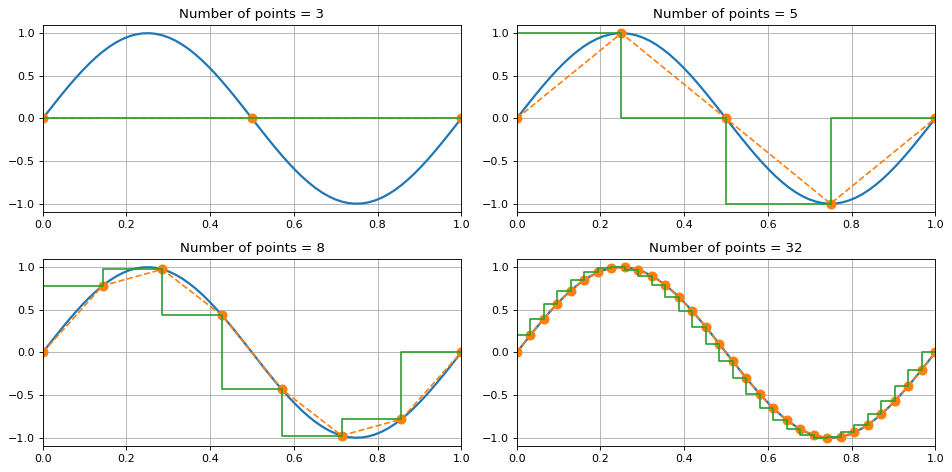

In [3]:
n = 64
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
ds = np.sin(2*np.pi*t)

# discrete step
step_lst = np.array([3, 5, 8, 32])

#plot figure
fig = plt.figure(figsize=(12, 6), dpi=80)
for i in range(4):
    tt = np.linspace(0, 1, step_lst[i], endpoint=True)
    
    plt.subplot(2, 2, i+1)
    plt.title('Number of points = {}'.format(step_lst[i]))
    plt.plot(t, ds, '-', linewidth=2.0)
    plt.plot(tt, np.sin(2*np.pi*tt), '--o', linewidth=1.5, markersize=8)
    plt.step(tt, np.sin(2*np.pi*tt), linewidth=1.5)
    plt.grid()
    plt.xlim([0, 1])
plt.tight_layout()

As you can see, the worst shape of the signal is obtained with a large value of the sampling step, that is, a large distance between adjacent samples of the digital signal.
The smaller the distance between adjacent samples (the smaller the sampling step and the greater the number of sequence points), the better the discrete signal repeats the shape of the analog signal.
____

### Discrete Sequences

** A discrete sequence ** is a mathematical model of a discrete signal, which is a lattice function: x (nT) = x (n), where * T * is the sampling interval, * n * = 0, 1, 2, ..., N -1 - counts or samples.

An example of a finite discrete sequence `x (nT) = {2, 1, -2, 0, 2, 3, 1, 0}`. This sequence looks as shown in the figure:

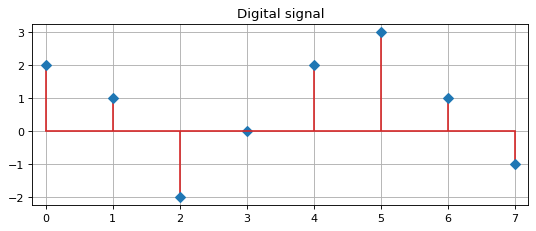

In [4]:
# Digital signal
xt = np.array([2, 1, -2, 0, 2, 3, 1, -1])
# Time vector
t = np.linspace(0, xt.size-1, xt.size, endpoint=True)

# Plot figure
fig = plt.figure(figsize=(8, 3), dpi=80)
plt.title('Digital signal') 
plt.stem(t, xt, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.xticks(t)
plt.xlim([np.min(t)-0.2, np.max(t)+0.2])
plt.grid(True)

### Delta function

** Single impulse ** - the simplest discrete sequence. This is a discrete δ-function δ (nT) * Dirac *, which is equal to one for n = 0 and zero for all other values ​​of n.

A discrete δ-function shifted in time by ** m ** clock intervals is written as follows: `δ (nT-mT)`.

### Single jump

The unit jump or ** Heaviside function ** is another kind of simple and important discrete sequences. It takes zero values ​​in the negative time domain and one in the positive.

Mathematically, the unit jump function is written as:

`σ(nT) = δ(nT) + δ(nT - T) + δ(nT - 2T) + ...`

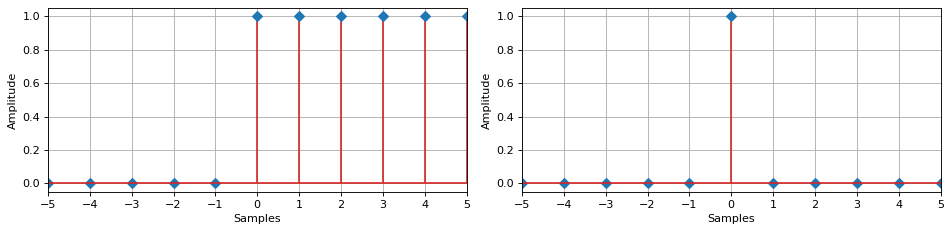

In [5]:
n = 6
# time vector
t = np.linspace(-n, n-1, 2*n)

# Delta function
xd = np.zeros(2*n)
xd[n] = 1

# Heaviside function
xh = np.heaviside(t, 1)

# Combine them together
xs = [xh, xd]

# Plot results
fig = plt.figure(figsize=(12, 3), dpi=80)
for i, sig in enumerate(xs):
    plt.subplot(1, 2, i+1)
    plt.stem(t, sig, linefmt='C3', markerfmt='D', use_line_collection=True)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.xticks(t)
    plt.xlim([np.min(t)+1, np.max(t)])
    plt.grid(True)
plt.tight_layout()

The discrete unit jump `σ(n)` and the discrete δ-function `δ(n)` are related by the following relations:

$ \delta (nT) = \sigma (nT) - \sigma (nT-T) $,

$ \sigma (nT) = \sum_ {k = 0} ^ {+ \infty} \delta (nT-kT) $,

An arbitrary discrete sequence can be written as a weighted sum of δ-functions:

$ x(nT) = \sum_ {k = 0} ^ {+ \infty} x(kT) \cdot \delta (nT-kT) $,

A sequence x(nT) is called periodic if it satisfies the condition `x(nT) = x(nT + mNT)`,
Where
- m and N are integers, m = 0, 1, 2, ..., NT
- *NT* - discrete sequence period.

## Z-transform

Discrete sequences are very convenient to describe using ** Z-form ** or Z-transformations.

* Z-transform * - analog of Laplace transform in discrete form. For a discrete sequence x (nT), the one-way Z-transform is defined by the following series:

$ X (z) = Z|x(nT)| = \sum_ {n = 0} ^ {\infty} x(nT) z ^ {- n} $,

where $ z = Re(z) + j \cdot Im(z) $ is a complex function, X(z) is the Z-form of the sequence x(nT).

The Z-transform is related to the Laplace transform through the formula:

$ z = e^{sT} $

### Z-transform properties

1. ** Linearity **

If the sequence x (nT) can be represented as a linear combination
$ x(nT) = a \cdot x_1(nT) + b \cdot x_2 (nT) $,

then $ X(z) = a \cdot X_1(z) + b \cdot X_2(z) $.

In other words, the Z-transform of the sum of signals is equal to the sum of the z-patterns of these signals.

2. ** Delay (time shift) **

$ Z [x(nT-mT)] = z ^ {- m} \cdot X(z) $.

Delaying the input signal by m introduces an additional factor of $ z ^ {- m} $.

3. ** Convolution **

For a sequence y (nT), the convolution of two sequences is:

$ y(nT) = \sum_ {m = 0} ^ {\infty} x_{1}(mT) \cdot x_{2}(nT-mT) $.

or

$ y(nT) = \sum_ {m = 0} ^ {\infty} x_{2}(mT) \cdot x_{1}(nT-mT) $.

And for the Z-shape:

$ Y(z) = X_{1}(z) \cdot X_{2}(z) $.

The Z-transform of the convolution of signals is equal to the product of their Z-images.

____

If the input signal x(nT) is represented as a weighted sum of δ-functions, then the Z-form takes the form

$ X(z) = \sum_ {k = 0} ^ {\infty} x(kT) \cdot z ^ {- k} $.

*Examples*

1. Write down the Z-form for the sequence `x(nT) = {1,2,3,4,5}`

$ X(z) = 1 + 2z ^ {- 1} + 3z ^ {- 2} + 4z ^ {- 3} + 5z ^ {- 4} $.

2. Write down the Z-form for the sequence as a unit jump `σ (nT)`.

$ X(z) = 1 + z ^ {- 1} + z ^ {- 2} + z ^ {- 3} + z ^ {- 4} + ... = \frac {1}{(1-z ^ {- 1})} $.

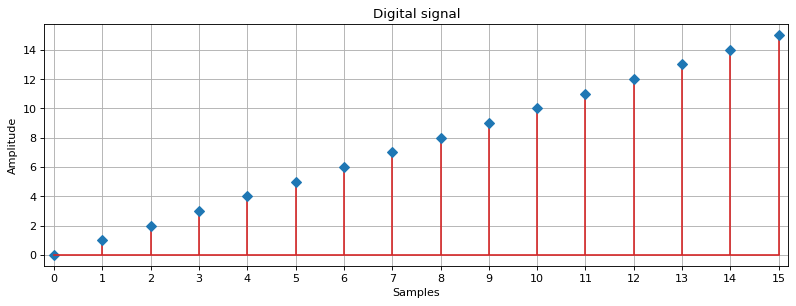

In [6]:
# Digital signal
xt = np.arange(16)

# Plot figure
fig = plt.figure(figsize=(12, 4), dpi=80)
plt.title('Digital signal') 
plt.stem(xt, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.xticks(xt)
plt.xlim([np.min(xt)-0.2, np.max(xt)+0.2])
plt.grid(True)

In the following chapters, we will get acquainted with the various waveforms, as well as with operations on them: filtering, convolution, converting to the frequency domain and vice versa.